## Initial imports

In [1]:
from scm.plams import *
from ase.build import bulk as ase_build_bulk
import matplotlib.pyplot as plt
import numpy as np
init()

PLAMS working folder: /home/hellstrom/adfhome/scripting/scm/plams/doc/source/examples/BandStructure/plams_workdir


## Metal band structure relative to Fermi energy

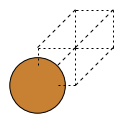

In [2]:
Cu = fromASE(ase_build_bulk('Cu', 'fcc', a=3.6)) # primitive cell
plot_molecule(Cu)

In [3]:
s = Settings()
s.input.ams.Task = 'SinglePoint'
s.input.DFTB.Periodic.BandStructure.Enabled = 'Yes'
s.input.DFTB.Model = 'SCC-DFTB'
s.input.DFTB.ResourcesDir = 'DFTB.org/matsci-0-3'
s.runscript.nproc = 1

In [4]:
job = AMSJob(settings=s, name='Cu', molecule=Cu)
job.run();

[16.01|17:09:06] JOB Cu STARTED
[16.01|17:09:06] JOB Cu RUNNING
[16.01|17:09:11] JOB Cu FINISHED
[16.01|17:09:11] JOB Cu SUCCESSFUL


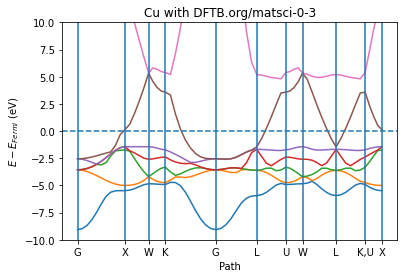

In [5]:
x, y_spin_up, y_spin_down, labels, fermi_energy = job.results.get_band_structure(unit='eV')
plot_band_structure(x, y_spin_up, None, labels, fermi_energy, zero='fermi')
plt.ylim(-10, 10)
plt.ylabel('$E - E_{Fermi}$ (eV)')
plt.xlabel('Path')
plt.title('Cu with DFTB.org/matsci-0-3')
plt.show()

## Semiconductor band structure relative to VBM

For a semiconductor like ZnO you can also choose to put the zero at the VBM ('vbm') or CBM ('cbm')

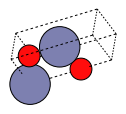

In [6]:
ZnO = fromASE(ase_build_bulk('ZnO', 'wurtzite', a=3.2, c=5.3, u=0.375))
plot_molecule(ZnO, rotation=('60x,60y,80z'))

In [7]:
s = Settings()
s.input.ams.Task = 'SinglePoint'
s.input.DFTB.Periodic.BandStructure.Enabled = 'Yes'
s.input.DFTB.Model = 'GFN1-xTB'
s.runscript.nproc = 1
job = AMSJob(settings=s, molecule=ZnO, name='ZnO')
job.run();

[16.01|17:09:11] JOB ZnO STARTED
[16.01|17:09:11] JOB ZnO RUNNING
[16.01|17:09:14] JOB ZnO FINISHED
[16.01|17:09:14] JOB ZnO SUCCESSFUL


The below call to ``plot_band_structure`` plots both the spin up and spin down. The spin-down bands are plotted as dashed lines. Note that in this case there is no spin polarization so the spin-down bands perfectly overlap the spin-up bands.

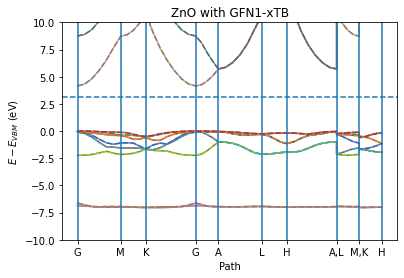

In [8]:
plot_band_structure(*job.results.get_band_structure(unit='eV'), zero='vbmax')
plt.ylim(-10, 10)
plt.ylabel('$E - E_{VBM}$ (eV)')
plt.xlabel('Path')
plt.title('ZnO with GFN1-xTB')
plt.show()

## Spin-up and spin-down band structures
If you perform a spin-polarized calculation you get both spin-up and spin-down bands. Below a spin-polarized DFT+U calculation on NiO is performed together with the BAND engine.

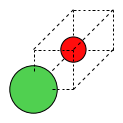

In [9]:
d =  2.085
mol = Molecule()
mol.add_atom(Atom(symbol='Ni', coords=(0, 0, 0)))
mol.add_atom(Atom(symbol='O', coords=(d, d, d)))
mol.lattice = [[0.0, d, d], [d, 0.0, d], [d, d, 0.0]]
plot_molecule(mol)

In [10]:
s = Settings()
s.input.ams.task = 'SinglePoint'
s.input.band.Unrestricted = 'yes'
s.input.band.XC.GGA = 'BP86'
s.input.band.Basis.Type = 'DZ'
s.input.band.NumericalQuality = 'Basic'
s.input.band.HubbardU.Enabled = 'Yes'
s.input.band.HubbardU.UValue = '0.6 0.0'
s.input.band.HubbardU.LValue = '2 -1'
s.input.band.BandStructure.Enabled = 'Yes'

job = AMSJob(settings=s, molecule=mol, name='NiO')
job.run();

[16.01|17:09:14] JOB NiO STARTED
[16.01|17:09:14] JOB NiO RUNNING
[16.01|17:09:45] JOB NiO FINISHED
[16.01|17:09:45] JOB NiO SUCCESSFUL


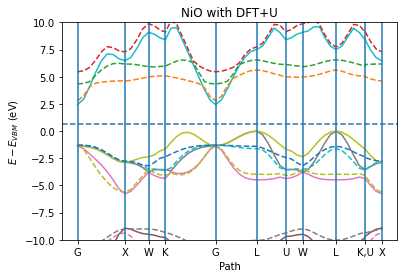

In [11]:
plot_band_structure(*job.results.get_band_structure(unit='eV'), zero='vbmax')
plt.ylim(-10, 10)
plt.ylabel('$E - E_{VBM}$ (eV)')
plt.xlabel('Path')
plt.title('NiO with DFT+U')
plt.show()